# Choose Calibration Method for RF - Isotonic or Logistic

In [6]:
random_state =123
X = tree_raw.drop('loan_status',axis=1)
y = tree_raw['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.25,random_state=random_state)
X_train = X_train[features]
X_test = X_test[features]

## (1) Isotonic

In [40]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_leaf=14, min_samples_split=9)
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_train_cali,y_train_cali = undersampler.fit_resample(X_train,y_train)
rf_calibration = CalibratedClassifierCV(rf, cv=5, method='isotonic')
rf_calibration.fit(X_train_cali,y_train_cali)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=100,
                                                             min_samples_leaf=14,
                                                             min_samples_split=9,
                                                             n_estimators=1000),
                       cv=5, method='isotonic')

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


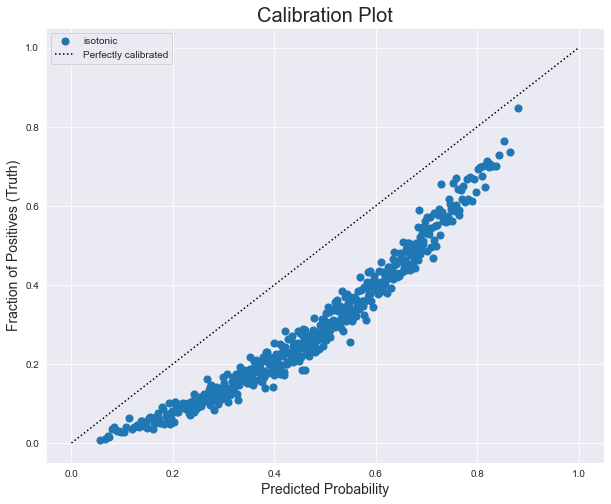

In [42]:
X_validation = X_validation[features]
predicted_prob = rf_calibration.predict_proba(X_validation)[:,1]
isotonic = pd.DataFrame(y_validation)
isotonic.columns= ['truth']
isotonic['calibration'] = predicted_prob
plot_distribution_predictions(y_proba_pred=isotonic['calibration'],y_true=isotonic['truth'],labels='isotonic',x_bins=500)

## (2) Logistic

In [7]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_leaf=14, min_samples_split=9)
undersampler = RandomOverSampler(sampling_strategy='minority')
X_train_cali,y_train_cali = undersampler.fit_resample(X_train,y_train)
rf_calibration = CalibratedClassifierCV(rf, cv=5, method='sigmoid')
rf_calibration.fit(X_train_cali,y_train_cali)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=100,
                                                             min_samples_leaf=14,
                                                             min_samples_split=9,
                                                             n_estimators=1000),
                       cv=5)

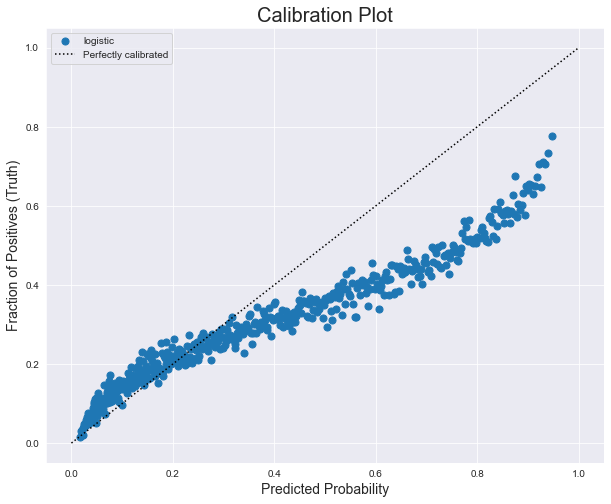

In [8]:
X_validation = X_validation[features]
predicted_prob = rf_calibration.predict_proba(X_validation)[:,1]
logestic = pd.DataFrame(y_validation)
logestic.columns= ['truth']
logestic['calibration'] = predicted_prob
plot_distribution_predictions(y_proba_pred=logestic['calibration'],y_true=logestic['truth'],labels='logistic',x_bins=500)